# Calories Burnt during Exercise using ANN

<br><b><i>What happens to your body when you do exercise?</i></b>

When you exercise, heart rate increases to circulate more oxygen (via the blood) at a quicker pace. The calories will burn due to increase in heart rate, height, weight, body temperature, etc parameters.

## Work Flow:
- Data Collection
- Data Pre-processing
- Data Analysis
- Train Test Split
- Model Creation
- Model Evaluation
- Hyper Parameter Tuning
- Creating Web App using Flask
- CI/CD Pipeline using Github Actions
- Deploying to Heroku

### Data Collection

Collected calories burnt dataset from kaggle.

Dataset Link: https://www.kaggle.com/datasets/fmendes/fmendesdat263xdemos?select=exercise.csv

The data have User_Id, Gender, Height, Weight, Duration, Heart Rate, Body Temp, Calories,
- User_Id : Unique Id of the user
- Gender : Gender of the user
- Height : Height of the user
- Weight : Weight of the user
- Duration : Time taken while doing exercise
- Heart Rate : Heart rate while doing exercise
- Body Temp : Body temperature while doing exercise
- Calories : Calories burnt while doing exercise

### Load Data

In [1]:
import pandas as pd

# Exercise Data
exercise_df = pd.read_csv('Dataset/exercise.csv')
exercise_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [2]:
# Calories Data
calories_df = pd.read_csv('Dataset/calories.csv')
calories_df.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [3]:
# Join exercise and calories dataframe
df = pd.merge(exercise_df, calories_df, on='User_ID')
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


### Data Pre-Processing

In [4]:
# Check shape of the dataset
df.shape

(15000, 9)

In [5]:
# Check basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


In [6]:
# Check null values in the dataset
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

### Data Analysis

In [7]:
# Get statistical measures of the dataset
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [8]:
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')

In [9]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


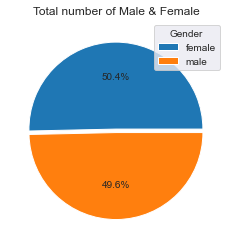

In [10]:
# Check how many male and female are in dataset
df['Gender'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=[0,0.04],labels=['',''])
plt.title('Total number of Male & Female')
plt.ylabel('')
plt.legend(['female','male'],title='Gender',loc ="upper right")
plt.show()

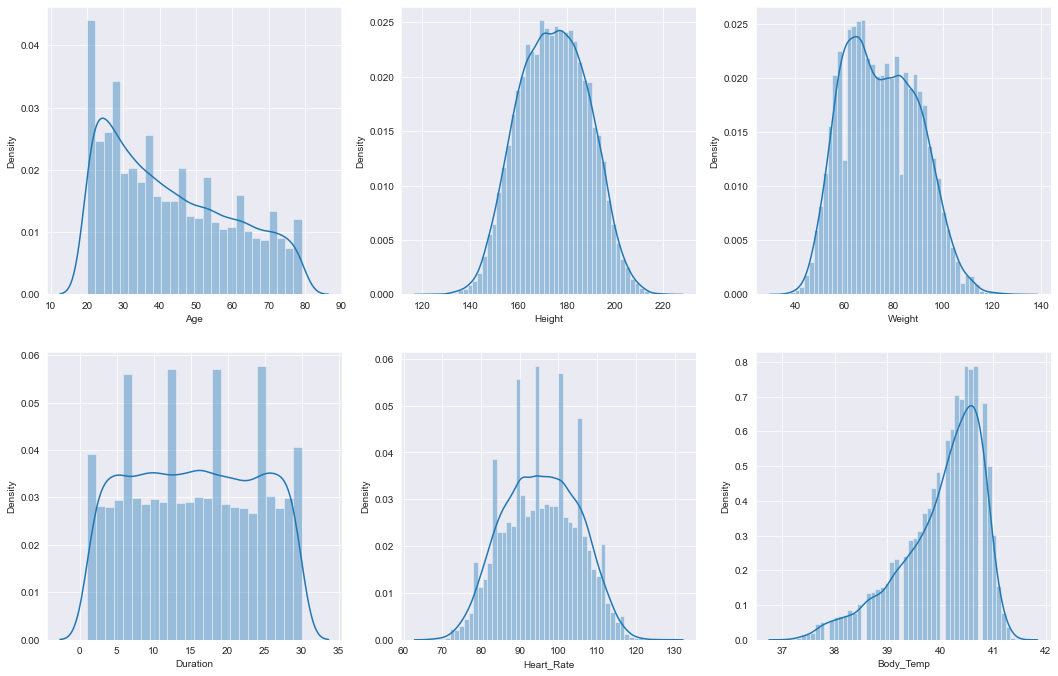

In [11]:
# Check distribution of Age, Height, Weight, Duration, Heart_Rate, Body_Temp
plt.figure(figsize=(18,18))

plt.subplot(3,3,1)
sns.distplot(df['Age'])

plt.subplot(3,3,2)
sns.distplot(df['Height'])

plt.subplot(3,3,3)
sns.distplot(df['Weight'])

plt.subplot(3,3,4)
sns.distplot(df['Duration'])

plt.subplot(3,3,5)
sns.distplot(df['Heart_Rate'])

plt.subplot(3,3,6)
sns.distplot(df['Body_Temp'])

plt.show()

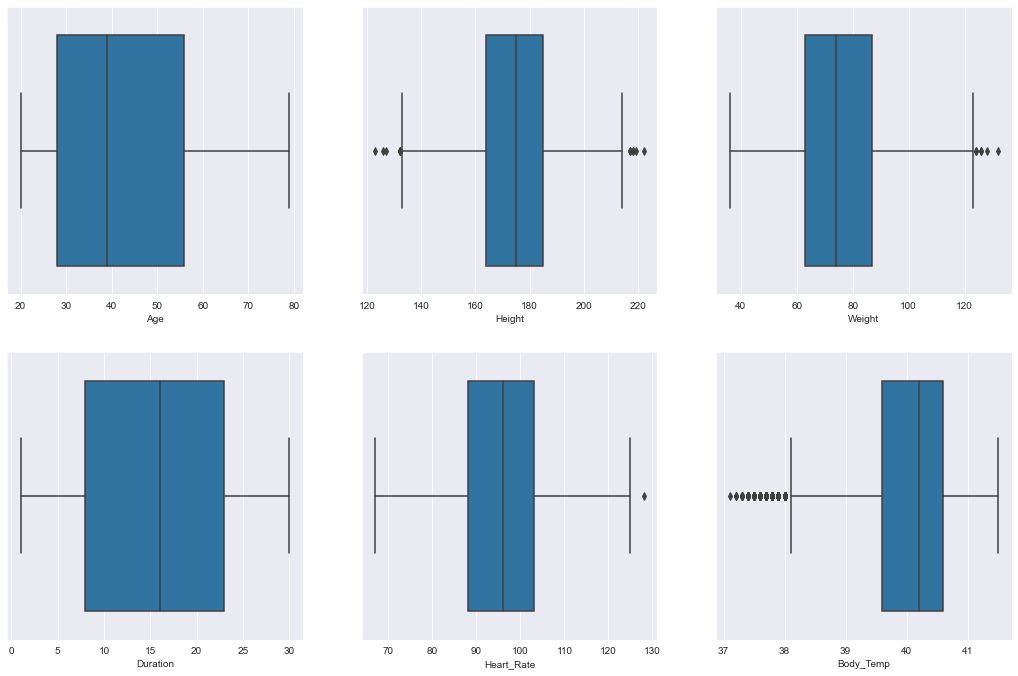

In [12]:
# Check outliers in Age, Height, Weight, Duration, Heart_Rate, Body_Temp
plt.figure(figsize=(18,18))

plt.subplot(3,3,1)
sns.boxplot(df['Age'])

plt.subplot(3,3,2)
sns.boxplot(df['Height'])

plt.subplot(3,3,3)
sns.boxplot(df['Weight'])

plt.subplot(3,3,4)
sns.boxplot(df['Duration'])

plt.subplot(3,3,5)
sns.boxplot(df['Heart_Rate'])

plt.subplot(3,3,6)
sns.boxplot(df['Body_Temp'])

plt.show()

Correlation:<br>
It is used to check relationship between two columns.
- Positive Correlation - It means if one feature increases then another feature also increases. In other words both feature are directly proportional to each other.
- Negative Correlation - Itmeans if one featyre increases then another feature decreases. In other words both feature are inversely proportional to each other.
- No Correlation - If there is 0 value it means there is no correlation.

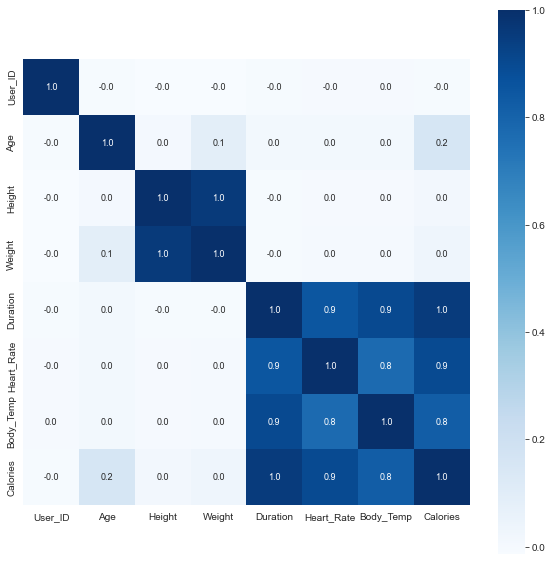

In [13]:
# Check correlation of each column using heat map
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, square=True, fmt='.1f', annot_kws={'size': 9}, cmap='Blues')
plt.show()

Converting categorical column to numerical

In [14]:
# One hot encoding on Gender column
encoded_gender = pd.get_dummies(df['Gender'], drop_first=True)
encoded_gender.head()

,male
0,1
1,0
2,1
3,0
4,0


In [15]:
# Concat df and encoded_gender column
new_df = pd.concat([df,encoded_gender], axis=1)

# Delete Gender Column
new_df.drop('Gender', axis=1, inplace=True)

new_df.head()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,male
0,14733363,68,190.0,94.0,29.0,105.0,40.8,231.0,1
1,14861698,20,166.0,60.0,14.0,94.0,40.3,66.0,0
2,11179863,69,179.0,79.0,5.0,88.0,38.7,26.0,1
3,16180408,34,179.0,71.0,13.0,100.0,40.5,71.0,0
4,17771927,27,154.0,58.0,10.0,81.0,39.8,35.0,0


### Train Test Split

In [16]:
# Seperating Dependent & Independent columns
x = new_df.drop(['User_ID', 'Calories'], axis=1) # Independent columns
y = new_df[['Calories']] # Dependent columns

In [17]:
# Shape of x and y
x.shape, y.shape

((15000, 7), (15000, 1))

In [18]:
# Splitting data into training and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [19]:
# Shape of x_train, x_test, y_train, and y_test
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((12000, 7), (3000, 7), (12000, 1), (3000, 1))

### Model Creation

In [20]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [21]:
# Libraries required for ANN
import tensorflow
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dropout

Can we use accuracy as metrics for Regression? - https://machinelearningmastery.com/regression-metrics-for-machine-learning/#:~:text=Accuracy%20(e.g.%20classification%20accuracy)%20is,an%20error%20in%20those%20predictions.

In [26]:
# ANN Architecture

# Initializing ANN
model = Sequential()

# Adding first hidden layer and input layer
model.add(Dense(units=32, kernel_initializer='he_uniform', activation='relu', input_dim=7))

# Adding second hidden layer
model.add(Dense(units=64, kernel_initializer='he_uniform', activation='relu'))

# Adding output layer
model.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='linear'))

# Compiling the ANN
model.compile(optimizer='adam', loss='mae', metrics=['mse'])

In [27]:
# Model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                256       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 2,433
Trainable params: 2,433
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Early Stopping
from tensorflow.python.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_loss', patience=15)

In [29]:
# Model Training
model_history = model.fit(x_train, y_train, batch_size=32, validation_split=0.3, epochs=100, callbacks=[callback])

Epoch 1/100
263/263 [==============================] - 2s 4ms/step - loss: 53.1143 - mse: 5735.6211 - val_loss: 10.7961 - val_mse: 185.4428
Epoch 2/100
263/263 [==============================] - 1s 2ms/step - loss: 9.2216 - mse: 136.2472 - val_loss: 7.7758 - val_mse: 98.5021
Epoch 3/100
263/263 [==============================] - 1s 3ms/step - loss: 6.3316 - mse: 67.2096 - val_loss: 5.0201 - val_mse: 42.7510
Epoch 4/100
263/263 [==============================] - 1s 2ms/step - loss: 3.4982 - mse: 22.3391 - val_loss: 2.3778 - val_mse: 10.9157
Epoch 5/100
263/263 [==============================] - 1s 2ms/step - loss: 2.0362 - mse: 8.6372 - val_loss: 1.7556 - val_mse: 6.6351
Epoch 6/100
263/263 [==============================] - 1s 2ms/step - loss: 1.6426 - mse: 5.7015 - val_loss: 1.4795 - val_mse: 4.6664
Epoch 7/100
263/263 [==============================] - 1s 2ms/step - loss: 1.4112 - mse: 4.2389 - val_loss: 1.3111 - val_mse: 3.7304
Epoch 8/100
263/263 [==============================] - 

### Model Evaluation

In [30]:
# Evaluation metrics for each epoch
hist = pd.DataFrame(model_history.history)
hist

,loss,mse,val_loss,val_mse
0,53.114250,5735.621094,10.796121,185.442825
1,9.221619,136.247192,7.775816,98.502090
2,6.331622,67.209648,5.020095,42.751041
3,3.498245,22.339144,2.377753,10.915692
4,2.036164,8.637158,1.755620,6.635148
...,...,...,...,...
95,0.416723,0.296492,0.440088,0.381060
96,0.414815,0.296931,0.427044,0.348396
97,0.417227,0.300742,0.434591,0.375897
98,0.402504,0.280331,0.413404,0.371325


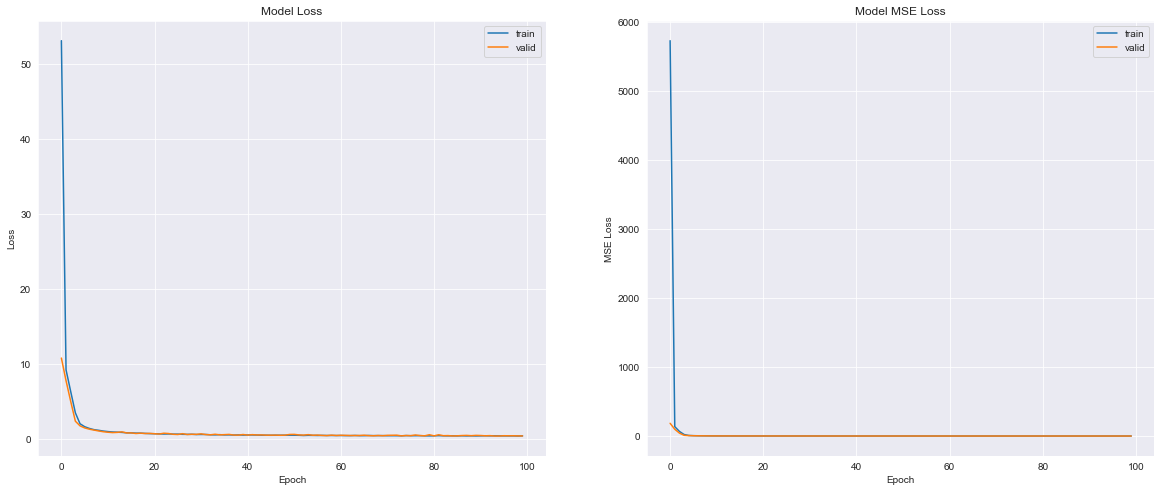

In [31]:
# Evaluating model train and validation loss

# Size of plot
plt.figure(figsize=(20, 8))

# Subplot 1 for train and validation loss
plt.subplot(1, 2, 1)
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend(loc='upper right')

# Subplot 2 for train and validation mse loss
plt.subplot(1, 2, 2)
plt.plot(model_history.history['mse'], label='train')
plt.plot(model_history.history['val_mse'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Model MSE Loss')
plt.legend(loc='upper right')

plt.show()

In [32]:
# Prediction on test data
y_pred = model.predict(x_test)

In [33]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [34]:
# R-Squared
R2 = r2_score(y_test, y_pred)
R2

0.9999312534488382

In [35]:
# Adjusted R-Squared
n = 3000 # Total sample size
p = 7  # Number of features
Adj_r2 = 1-(1-R2)*(n-1)/(n-p-1)
Adj_r2

0.9999310926113187

In [36]:
# Mean Squared Error
mean_squared_error(y_test, y_pred)

0.2674496980601328

In [37]:
# Mean Absolute Error
mean_absolute_error(y_test, y_pred)

0.40251251046856246

In [38]:
# Save Model
model.save('calories.h5')

In [39]:
# Load Model
from tensorflow.python.keras.models import load_model

model = load_model('calories.h5')

In [41]:
# Save scaler object
import pickle

with open('scaler.pkl', 'wb') as file:
    pickle.dump(sc, file)

In [42]:
# Load scaler object
with open('scaler.pkl', 'rb') as file:
    sc = pickle.load(file)

In [43]:
# Creating Pipeline
from sklearn.pipeline import Pipeline

calories_burnt_pipeline = Pipeline(steps=[
    ('scaling', sc),
    ('model', model)
])

In [50]:
# Predicting output on single data
import numpy as np
# a = [Age, Height, Weight, Duration, Heart_Rate, Body_Temp, male]
a = [48, 180.0, 50.0, 29.0, 105.0, 41.8, 1]
a = np.array(a) # convert to a numpy array
a = np.expand_dims(a, 0) # change shape from (7,) to (1,7)
print("Predicted Calories Burnt:", calories_burnt_pipeline.predict(a)[0,0])

Predicted Calories Burnt: 183.61816


### Hyper Parameter Tuning with KerasTuner 
Decide number of hidden layers and neurons in Neural Network<br>
Link: https://www.analyticsvidhya.com/blog/2021/06/tuning-hyperparameters-of-an-artificial-neural-network-leveraging-keras-tuner/

In [121]:
class ANNHyperModel(HyperModel):
    def build(self, hp):
        # Initializing ANN
        model = tf.keras.models.Sequential()

        # Tune the number of layers.
        for i in range(hp.Int("num_layers", min_value=2, max_value=20)):
            # Adding hidden layers
            model.add(
                tf.keras.layers.Dense(
                    # Tune number of neurons in each layer.
                    units=hp.Int(f"units_{i}", min_value=32, max_value=512, step=32),
                    kernel_initializer = 'he_uniform',
                    activation='relu',
                )
            )
            
            # Dropout Layer to avoid overfitting
            if hp.Boolean("dropout"):
                model.add(tf.keras.layers.Dropout(rate=0.2))

        # Adding output layer
        model.add(tf.keras.layers.Dense(1, kernel_initializer='glorot_uniform', activation="linear"))
        
        # Tune the learning rate for the optimizer
        # Choose an optimal value from 0.01, 0.001, or 0.0001
        hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

        # Compiling the ANN
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
            loss='mae',
            metrics=['mse'],
        )

        return model

# Initializing HyperModel
hypermodel = ANNHyperModel()

# It take random combination values to train model
tuner = kt.RandomSearch(
    hypermodel,
    objective="val_loss",
    max_trials=5,
    executions_per_trial=2,
    overwrite=True,
    directory="keras_tuner_dir",
    project_name="Calories Burnt",
)

# Start the search for the best hyperparameter configuration
tuner.search(x_train, y_train, epochs=25, validation_data=(x_test, y_test))

Trial 5 Complete [00h 05m 54s]
val_loss: 5.573785066604614

Best val_loss So Far: 0.5622307062149048
Total elapsed time: 00h 23m 51s
INFO:tensorflow:Oracle triggered exit


In [123]:
# Get the top 1 models.
models = tuner.get_best_models(num_models=1)
best_model = models[0]

best_model.build(input_shape=x_train.shape)
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (12000, 288)              2304      
                                                                 
 dense_1 (Dense)             (12000, 128)              36992     
                                                                 
 dense_2 (Dense)             (12000, 384)              49536     
                                                                 
 dense_3 (Dense)             (12000, 1)                385       
                                                                 
Total params: 89,217
Trainable params: 89,217
Non-trainable params: 0
_________________________________________________________________


In [124]:
# Now you can train the best_model
best_model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.3)

Epoch 1/10
263/263 [==============================] - 3s 10ms/step - loss: 0.5437 - mse: 0.5816 - val_loss: 0.5240 - val_mse: 0.5748
Epoch 2/10
263/263 [==============================] - 3s 10ms/step - loss: 0.5747 - mse: 0.6251 - val_loss: 0.6232 - val_mse: 0.7473
Epoch 3/10
263/263 [==============================] - 3s 9ms/step - loss: 0.5421 - mse: 0.5613 - val_loss: 0.5906 - val_mse: 0.6576
Epoch 4/10
263/263 [==============================] - 3s 10ms/step - loss: 0.5509 - mse: 0.5776 - val_loss: 0.5924 - val_mse: 0.7245
Epoch 5/10
263/263 [==============================] - 2s 9ms/step - loss: 0.5681 - mse: 0.6139 - val_loss: 0.6357 - val_mse: 0.7291
Epoch 6/10
263/263 [==============================] - 2s 9ms/step - loss: 0.5501 - mse: 0.5665 - val_loss: 0.5137 - val_mse: 0.5314
Epoch 7/10
263/263 [==============================] - 3s 10ms/step - loss: 0.5524 - mse: 0.5679 - val_loss: 0.5067 - val_mse: 0.5332
Epoch 8/10
263/263 [==============================] - 3s 10ms/step - los

### Creating Web App using Flask
Created simple UI using flask framework.

### CI/CD Pipeline using Github Actions
Uploaded code to the github repository. Then created CI/CD pipeline for automatic deployment to Heroku.

### Deploying to Heroku
Deployed flask app to Heroku using CI/CD pipeline with Docker.